# How to classify MNIST digits with a CONVOLUTIONAL neural network architecture?

https://adamharley.com/nn_vis/cnn/3d.html pour déterminer des nombres avec deep learning CNN

In [92]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils  import to_categorical
from tensorflow.keras.layers import Dense # Dense layers are "fully connected" layers
from tensorflow.keras.models import Sequential # Documentation: https://keras.io/models/sequential/
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten


Load the MNIST data (or downlaod it if not already done) 

In [93]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [94]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Prepare and convert the data

In [95]:
np.set_printoptions(linewidth=150)   # Enlarge the line the see all the element in one column
print(x_train[2024])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   5  18  18 131 136 136 164 254 255 254 249 136  59   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   8 152 253 253 253 253 253 253 253 253 253 253 253 253 14

In [96]:
print(y_train[2024])

7


In [97]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28   # = 784 
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [98]:
print("Training label shape: ", y_train.shape) # (60000,) -- 60000 numbers (all 0-9)
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [99]:
print(y_train[2024])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [100]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten

model = Sequential()

# Reshape the input data to 28x28x1
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Add convolutional layers

#filters = kernels
model.add(Conv2D(filters = 6, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #params = (3*3+1)*6 = 60 , 3*3 is the filter size, 1 is the bias, 6 is the number of filters
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

c:\Users\nolan\anaconda3\envs\Nolan_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_10            │ (None, 13, 13, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_11            │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 84)             │        10,836 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,954 (249.82 KB)

 Trainable params: 63,954 (249.82 KB)

 Non-trainable params: 0 (0.00 B)

Compile, train and evaluate the model

In [101]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7292 - loss: 1.0109 - val_accuracy: 0.9613 - val_loss: 0.1244
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9603 - loss: 0.1328 - val_accuracy: 0.9655 - val_loss: 0.1188
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9708 - loss: 0.0916 - val_accuracy: 0.9778 - val_loss: 0.0787
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9755 - loss: 0.0770 - val_accuracy: 0.9805 - val_loss: 0.0699
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9795 - loss: 0.0642 - val_accuracy: 0.9757 - val_loss: 0.0828
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9675 - loss: 0.1001


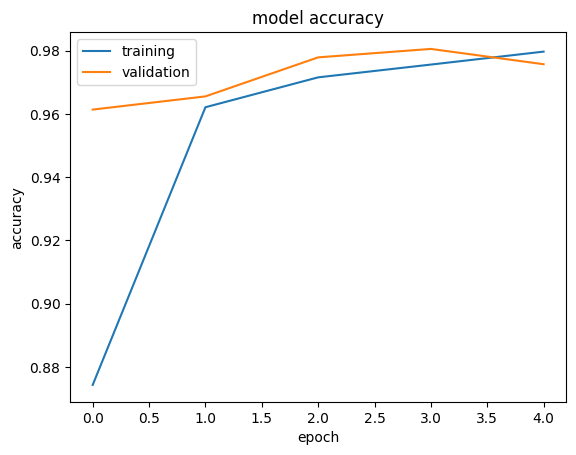

Test loss: 0.0825
Test accuracy: 0.972


In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted labels: [7 2 1 ... 4 5 6]
True labels: [7 2 1 ... 4 5 6]
Indices of incorrect predictions: [  18   33  115  217  241  247  259  321  420  444  445  449  582  583  659  674  684  717  726  740  813  839  898  924  938  947  956  965  969
 1014 1039 1062 1101 1107 1112 1156 1182 1226 1232 1242 1248 1260 1319 1326 1337 1349 1355 1415 1453 1459 1469 1500 1527 1530 1549 1551 1553 1570
 1581 1600 1621 1654 1681 1686 1709 1721 1732 1754 1790 1828 1878 1901 1938 1941 2016 2035 2040 2043 2063 2070 2109 2118 2130 2135 2189 2266 2293
 2308 2387 2405 2406 2414 2433 2447 2455 2462 2488 2496 2539 2560 2573 2582 2607 2635 2648 2654 2758 2760 2771 2812 2896 2929 2952 2953 2959 2995
 3023 3030 3060 3069 3206 3207 3225 3289 3316 3333 3422 3451 3503 3520 3522 3558 3559 3656 3658 3681 3723 3726 3736 3751 3767 3780 3796 3808 3818
 3838 3869 3926 3941 3995 4017 4044 4065 4075 4078 4156 4163 4205 4238 4248 4265 4294 4306 4317 4344 4369 4380 4500 4536 4578 46

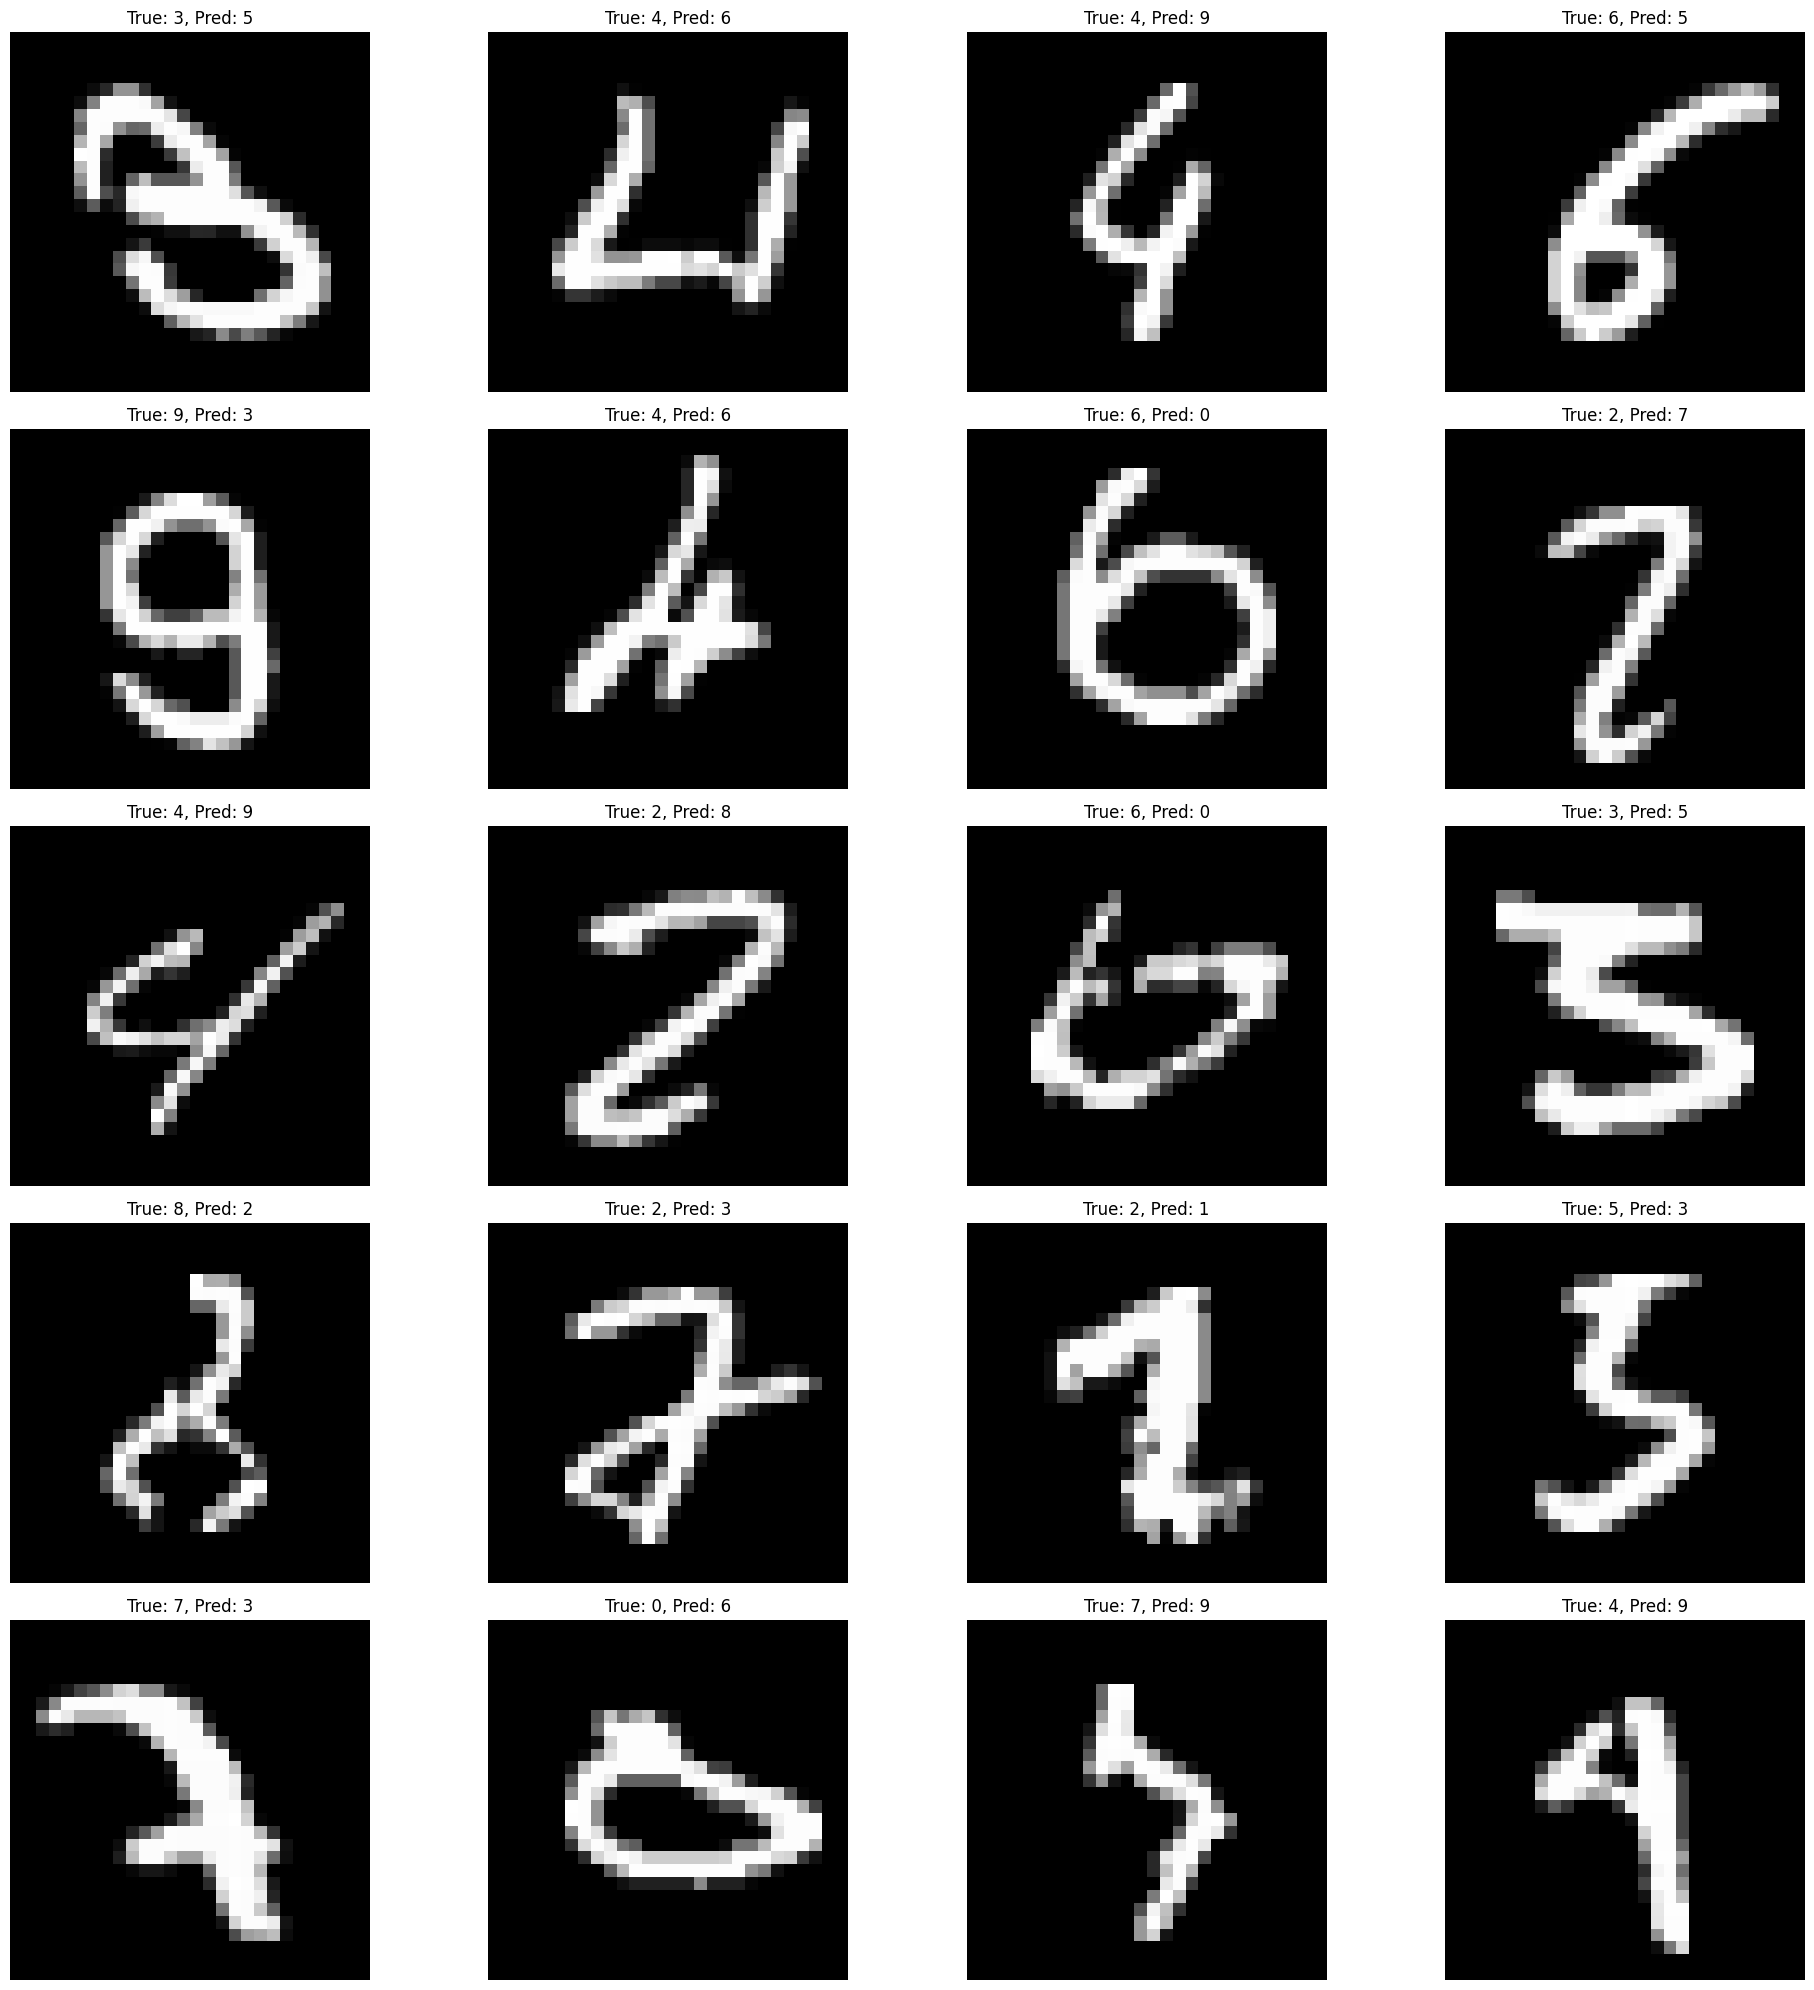

In [104]:
# Predict the labels for the test dataset
predicted_labels = np.argmax(model.predict(x_test), axis=1)
true_labels = np.argmax(y_test, axis=1)

print("Predicted labels:", predicted_labels)
print("True labels:", true_labels)

# Find the indices where the predictions are incorrect
incorrect_indices = np.where(predicted_labels != true_labels)[0]

print("Indices of incorrect predictions:", incorrect_indices)
print("Number of incorrect predictions:", len(incorrect_indices))

# Display the incorrect predictions and their true labels
num_to_display = 20  # Increase the number of incorrect predictions to display
plt.figure(figsize=(20, 20))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    plt.subplot(5, 4, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[idx]}, Pred: {predicted_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [105]:
print( np.argmax( model.predict( np.array([x_train[17]]) )))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
8


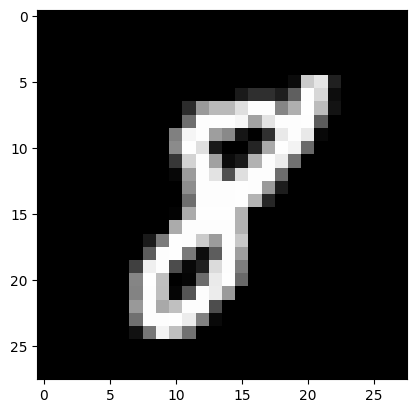

In [106]:
plt.imshow(x_train[17].reshape(28, 28), cmap='gray')
plt.show()
